## PROJECT:    PREDICTING CHARGES OF HEALTH INSURANCE

IMPORTING LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy

import warnings
warnings.filterwarnings('ignore')

In [3]:
data =pd.read_csv(r"C:\Users\Rajani-janah\Desktop\Data Science\Data mining\datasets\Health_insurance.csv")
display(data.head())
original_data = data.copy(deep=True) # Copy DataFrame before....

print('\n\033[1mInference:\033[0m The Dataset consists of {} features & {} observations.'.format(data.shape[1], data.shape[0]))

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



Inference: The Dataset consists of 7 features & 1338 observations.


In [4]:
# First Five rows of data
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#Shape of the data
data.shape

(1338, 7)

In [6]:
contingency_table1 = pd.crosstab(data['sex'],data['smoker'],margins = True)
contingency_table1

smoker,no,yes,All
sex,,,
female,547,115,662
male,517,159,676
All,1064,274,1338


In [8]:
from scipy.stats import chi2_contingency
def chi_square(c1,c2):
    chi_2, p_val, dof, exp_val = chi2_contingency(pd.crosstab(data[c1],data[c2],margins = False))# make sure margins = False

    print(exp_val)
    #print('\nChi-square is : %f'%chi_2, '\n\np_value is : %f'%p_val, '\n\ndegree of freedom is : %i'%dof)
    print(f'\nChi-square is : {chi_2}', f'\n\np_value is : {p_val}', f'\n\ndegree of freedom is :{dof}')

    if p_val < 0.05:# consider significan level is 5%
        print("\nThere is some correlation between the two variables at 0.05 significant level")
    else:
        print("\nThere is no correlation between the two variables")

In [9]:
chi_square("smoker",'sex')

[[526.43348281 537.56651719]
 [135.56651719 138.43348281]]

Chi-square is : 7.39291081459996 

p_value is : 0.006548143503580696 

degree of freedom is :1

There is some correlation between the two variables at 0.05 significant level


In [15]:
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [16]:
chi_square("region",'sex')

[[160.30493274 163.69506726]
 [160.79970105 164.20029895]
 [180.09566517 183.90433483]
 [160.79970105 164.20029895]]

Chi-square is : 0.43513679354327284 

p_value is : 0.9328921288772233 

degree of freedom is :3

There is no correlation between the two variables


In [11]:
import researchpy as rp
rp.summary_cont(data['age'].groupby(data['sex']))

ModuleNotFoundError: No module named 'researchpy'

In [12]:
import statsmodels.formula.api as smf

model = smf.ols("age ~ C(sex)", data= data).fit()
stats.shapiro(model.resid)

ShapiroResult(statistic=0.9459049105644226, pvalue=9.685404478007983e-22)

In [13]:
#Importing the dataset

data =pd.read_csv(r"C:\Users\Rajani-janah\Desktop\Data Science\Data mining\datasets\Health_insurance.csv")
display(data.head())
original_data = data.copy(deep=True) # Copy DataFrame before....

print('\n\033[1mInference:\033[0m The Dataset consists of {} features & {} observations.'.format(data.shape[1], data.shape[0]))

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



Inference: The Dataset consists of 7 features & 1338 observations.


In [14]:
#X=data.select_dtypes(exclude='object')
X = data[['age', 'bmi', 'children']]
X.head()
y = data['charges']#y needs to be a Series or 1D array

In [15]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [17]:
import statsmodels.api as sm
X2 = sm.add_constant(X) 
ols = sm.OLS(y,X2)
lr = ols.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     60.69
Date:                Thu, 13 Jan 2022   Prob (F-statistic):           8.80e-37
Time:                        07:41:57   Log-Likelihood:                -14392.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1334   BIC:                         2.881e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6916.2433   1757.480     -3.935      0.0

In [7]:
 #Data type of each attribute

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#Checking the presence of missing values

data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [16]:
#Five point summary of numerical attributes

data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [17]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [4]:
#listing unique variables of object columns
{col:list(data[col].unique()) for col in data.select_dtypes('object')}

{'sex': ['female', 'male'],
 'smoker': ['yes', 'no'],
 'region': ['southwest', 'southeast', 'northwest', 'northeast']}

In [11]:
region_serie=data.groupby('region').size()
smoker_serie=data.groupby('smoker').size()
sex_serie=data.groupby('sex').size()

series={
    
    'Sex':sex_serie,
    'Region':region_serie,
    'Smoker':smoker_serie
    
}


def pie_plot(serie,title):
    
    
    serie.plot(kind='pie',title=title, figsize=[20,8],colors=['#77dd77','#fdfd96','#84b6f4','#fdcae1'],
          autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*serie.sum()))
    plt.ylabel(None)

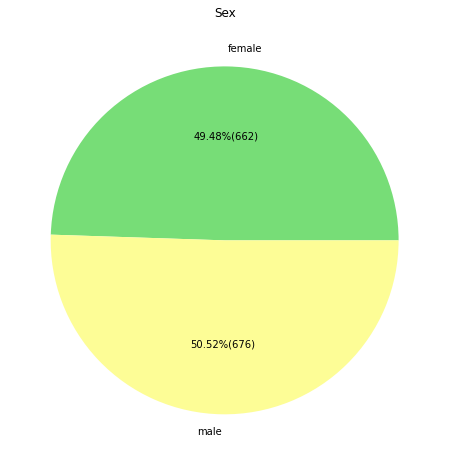

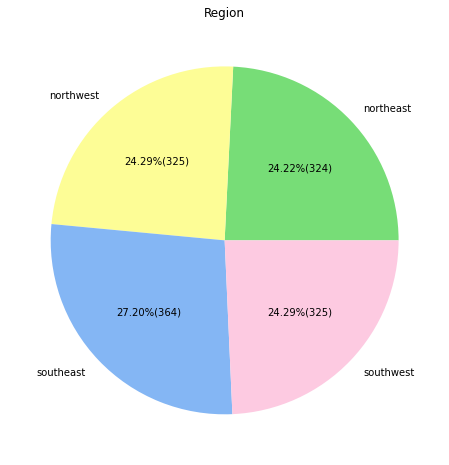

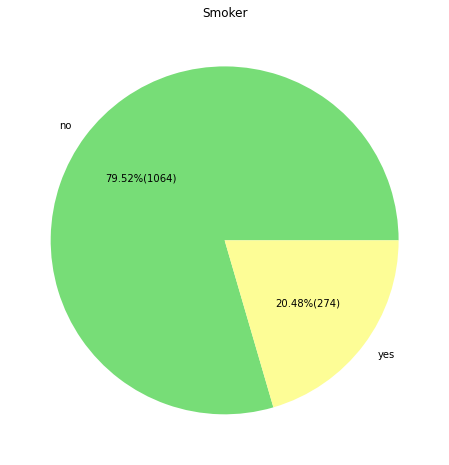

In [12]:
for i,j in series.items():
    
    plt.subplots(1,1)
    pie_plot(j,i)

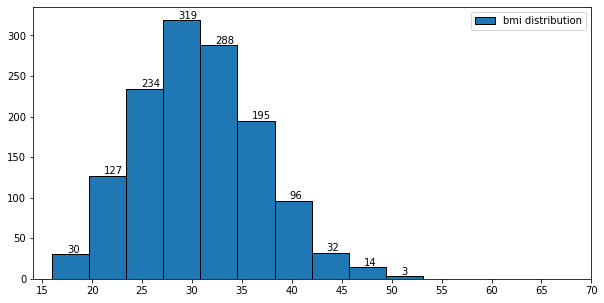

In [12]:
#bmi' distribution

fg,ax = plt.subplots(figsize=(10,5))
n, bins, patches = ax.hist(data.bmi,edgecolor='k',label='bmi distribution')
ax.set_xticks(ticks=range(15,75,5))
for idx, value in enumerate(n):
    ax.text(bins[idx]+1.5,n[idx]+2,round(value))
    ax.legend()
    fg.show

In [ ]:
#'bmi' is normally distributed

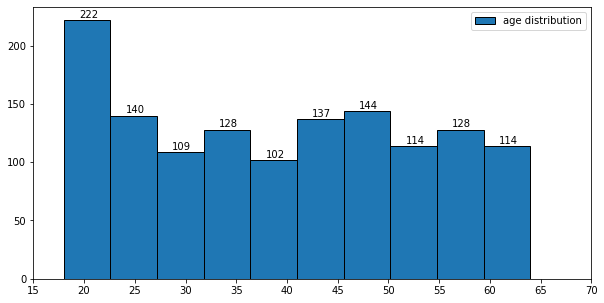

In [13]:
#age' distribution

fg,ax = plt.subplots(figsize=(10,5))
n, bins, patches = ax.hist(data.age,edgecolor='k',label='age distribution')
ax.set_xticks(ticks=range(15,75,5))
for idx, value in enumerate(n):
  ax.text(bins[idx]+1.5,n[idx]+2,round(value))
ax.legend()
fg.show()

In [ ]:
#age' is uniformally distributed

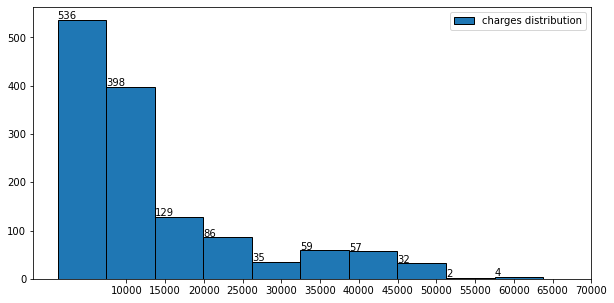

In [14]:
#charges' distribution

fg,ax = plt.subplots(figsize=(10,5))
n, bins, patches = ax.hist(data.charges,edgecolor='k',label='charges distribution')
ax.set_xticks(ticks=range(10000,75000,5000))
for idx, value in enumerate(n):
    ax.text(bins[idx]+1.5,n[idx]+2,round(value))
    ax.legend()
    fg.show

In [ ]:
#charges' are highly skewed

<function matplotlib.pyplot.show(close=None, block=None)>

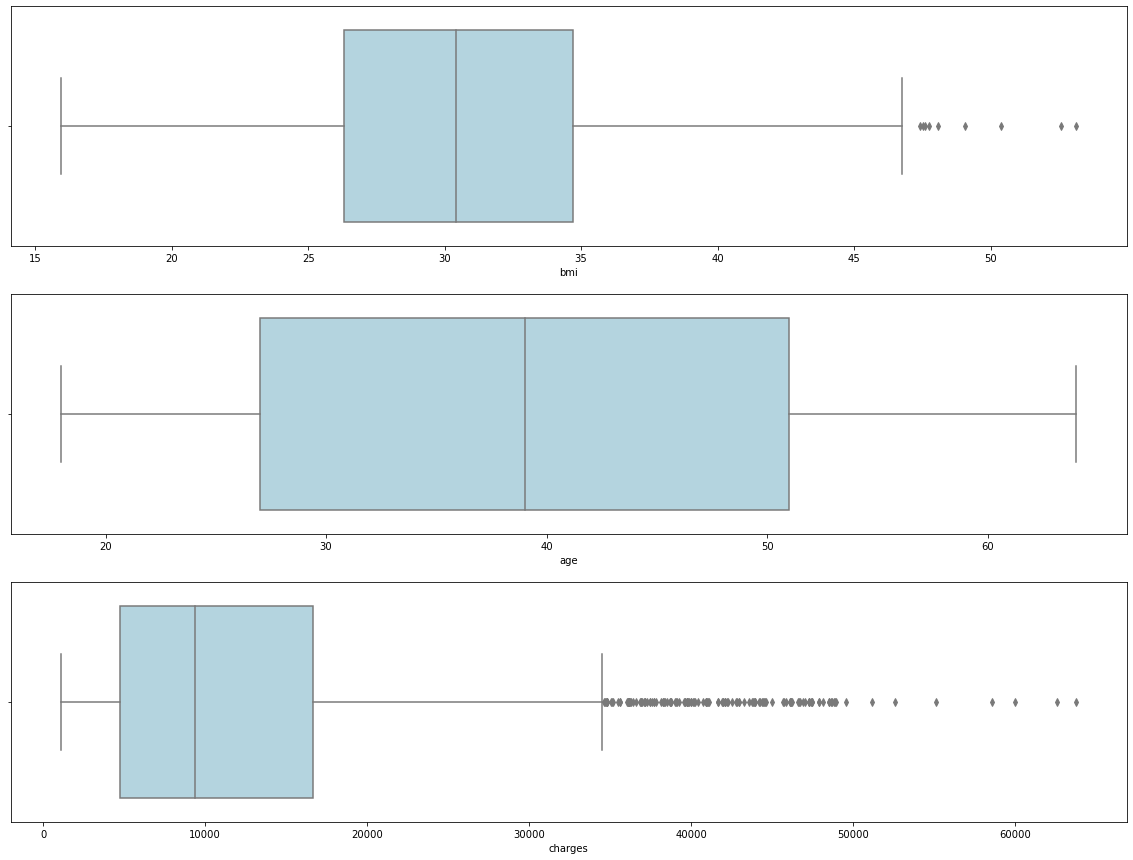

In [15]:
#Checking the presence of outliers in 'bmi','age' and 'charges' columns

plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= data.bmi, color='lightblue')

plt.subplot(3,1,2)
sns.boxplot(x= data.age, color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x= data.charges, color='lightblue')

plt.show

In [ ]:
#'bmi' has very few outliers (extreme values)
#age' has no outliers
#charges' are highly skewed so lot of outliers present

<function matplotlib.pyplot.show(close=None, block=None)>

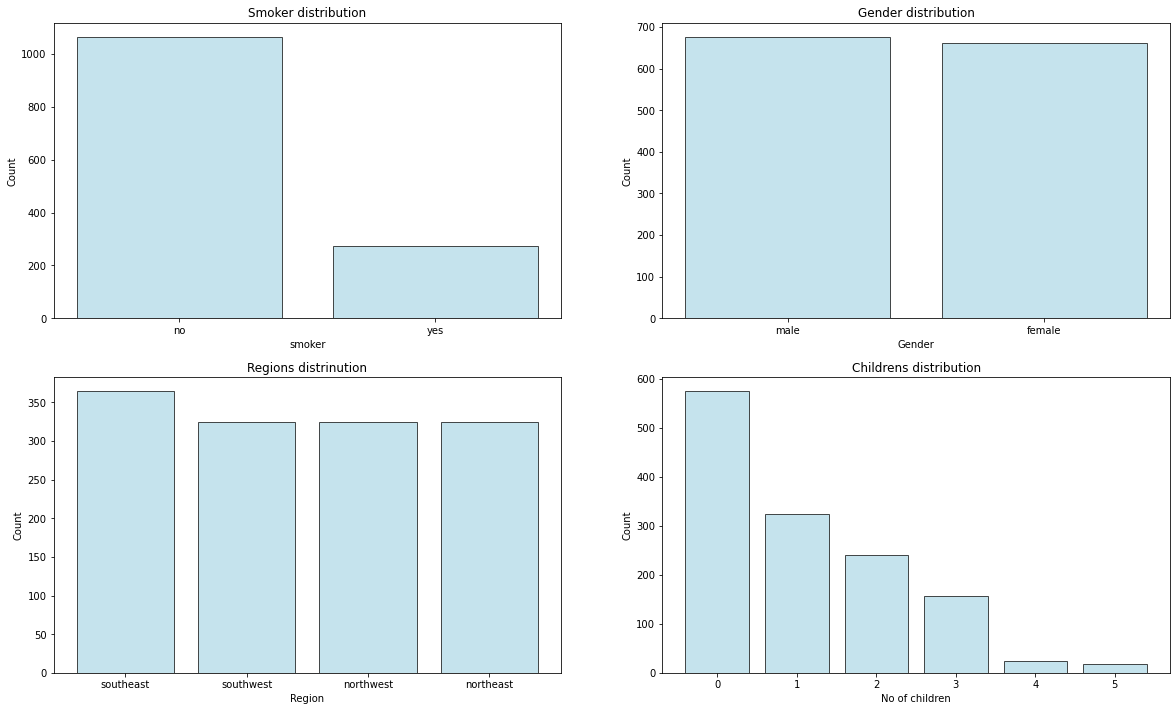

In [18]:
#Distribution of categorical columns (include children)
plt.figure(figsize=(20,25))


x=data.smoker.value_counts().index  # values for x-axis
y=[data['smoker'].value_counts()[i] for i in x] #count of each class on y-axis

plt.subplot(4,2,1)
plt.bar(x,y,align='center',color = 'lightblue',edgecolor='black',alpha = 0.7)  # bar chart plotting
plt.xlabel('smoker')
plt.ylabel('Count')
plt.title('Smoker distribution')

x1 = data.sex.value_counts().index   #values for x-axis
y1 = [data['sex'].value_counts()[j] for j in x1]  # count of each class on y-axis


plt.subplot(4,2,2)
plt.bar(x1,y1, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  # bar chart
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender distribution')

x2 = data.region.value_counts().index # values for x-axis
y2 = [data['region'].value_counts()[k] for k in x2]  # count of each class on y-axis

plt.subplot(4,2,3)
plt.bar(x2,y2,align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7) # bar chart
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Regions distrinution')

x3 = data.children.value_counts().index
y3 = [data['children'].value_counts()[l] for l in x3]

plt.subplot(4,2,4)
plt.bar(x3,y3, align='center',color= 'lightblue',edgecolor = 'black',alpha = 0.7)
plt.xlabel('No of children')
plt.ylabel('Count')
plt.title('Childrens distribution')

plt.show

Bivariate analysis:charges of smoker and non smoker

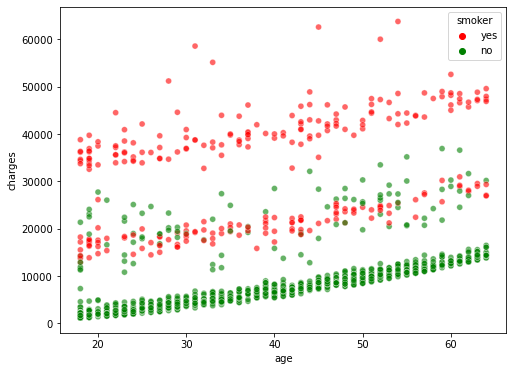

In [17]:
# scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data.age, data.charges,hue=data.smoker,palette= ['red','green'],alpha=0.6)
plt.show()

Smokers dependency on charges differs from non-smoker.
Smokers claim significantly more money as compared to non-smoker.

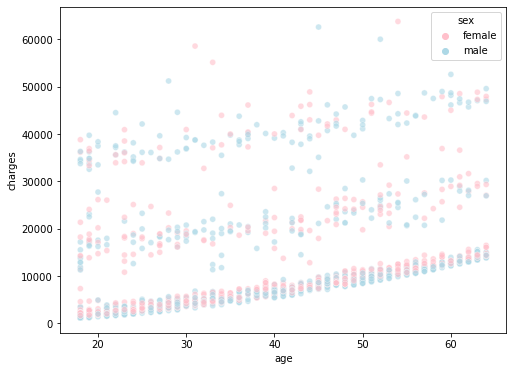

In [18]:
 #bmi' of males and females

plt.figure(figsize=(8,6))
sns.scatterplot(data.age, data.charges,hue=data.sex,palette= ['pink','lightblue'],alpha=0.6)
plt.show()

No relation appeared between gender and charges.
Therefore, no effect of gender on 'bmi'.

In [19]:
data.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

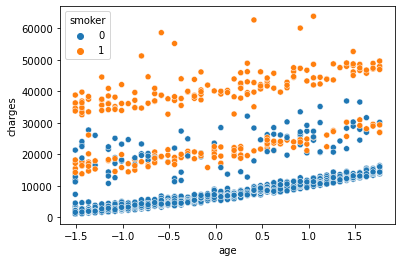

In [33]:
# Check the charges of smokers and non-smokers across different ages
sns.scatterplot(x = 'age', y = 'charges', hue = 'smoker', data = data);

#By looking into above graph, we can say "charges of smokers and non-smokers are different". But is the difference statistically significant?

Steps:
    1.State the H0 and Ha
    2. Decide the significance level: alpha = 0.05
    3. Identify the test-statistic: 2 sample t - test
    4. Calculate P_value using test-statistic/t-score
    

In [20]:
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols

import statsmodels.api as sm

 Is the distribution of bmi across women with no children, one child and two children, the same?

In [21]:
# Check the bmi of women with no children, one child and two children

zero_child = data[data['children'] == 0]
women_zero_child_bmi = zero_child[zero_child['sex'] == 'female'].bmi

one_child = data[data['children'] == 1]
women_one_child_bmi = one_child[one_child['sex'] == 'female'].bmi

two_child = data[data['children'] == 2]
women_two_child_bmi = two_child[two_child['sex'] == 'female'].bmi

children_bmi_data = pd.DataFrame()

data1            = pd.DataFrame({'children': 'zero', 'bmi':women_zero_child_bmi})
data2          = pd.DataFrame({'children': 'one', 'bmi':women_one_child_bmi})
data3          = pd.DataFrame({'children': 'two', 'bmi':women_two_child_bmi})

children_bmi_data = children_bmi_data.append(data1) 
children_bmi_data = children_bmi_data.append(data2) 
children_bmi_data = children_bmi_data.append(data3)

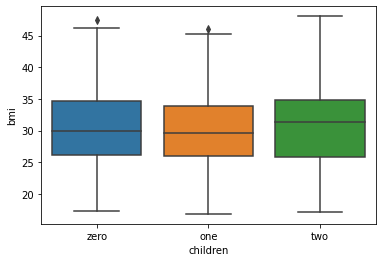

In [23]:
sns.boxplot(x = "children", y = "bmi", data = children_bmi_data);

In [24]:
#. Calculate P_value using ANOVA table
mod = ols('bmi ~ children', data = children_bmi_data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

p_value = aov_table['PR(>F)'][0]

                sum_sq     df         F    PR(>F)
children     24.590123    2.0  0.334472  0.715858
Residual  20695.661583  563.0       NaN       NaN


In [25]:
#Decide to Reject or Accept Null Hypothesis
reject_null = False
if p_value < 0.05:
    reject_null = True 
else: 
    reject_null = False
    
print("reject null? : " + str(reject_null))

reject null? : False


Hence we fail to reject Null Hypothesis (we have enough (95% and 99%) evidence to prove 
                                         that women with no children, one child and two children has no effect on bmi

Feature Engineering

In [13]:
from sklearn.preprocessing import LabelEncoder

for obj_col in data.select_dtypes('object'):
  LE = LabelEncoder()
  data[obj_col] = LE.fit_transform(data[obj_col]) #Converting categorical data to numerical

In [14]:
from sklearn.preprocessing import StandardScaler

for num_col in data[['age','bmi']]:
  SS = StandardScaler()
  data[num_col] = SS.fit_transform(data[[num_col]]) #Scaling numerical data

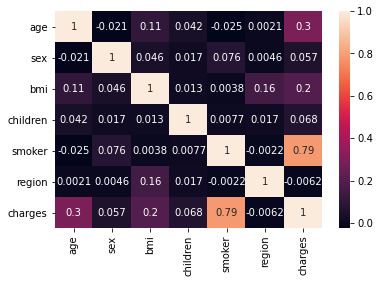

In [15]:
sns.heatmap(data.corr(),annot=True);

In [16]:
from sklearn.model_selection import train_test_split

X = data[['age','bmi','smoker']]
Y = data['charges']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=12)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1070, 3), (268, 3), (1070,), (268,))

In [17]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

LR.fit(X_train, Y_train)

Y_Pred = LR.predict(X_test)

In [18]:
LR.intercept_

8350.76405105929

In [19]:
LR.coef_

array([ 3717.14494198,  2030.9733929 , 23865.19864305])

In [20]:
pd.DataFrame({'Actual': Y_test,'Predicted' : Y_Pred}).head()

,Actual,Predicted
936,32108.66282,9309.983403
728,2217.60120,5941.967036
1307,21472.47880,29461.130808
924,6250.43500,6868.052476
137,2045.68525,1968.095149


In [55]:
from sklearn import metrics
import numpy as np
  
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_Pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_Pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_Pred))) 

NameError: name 'Y_test' is not defined

In [23]:
data.charges.mean()/10

1327.0422265141256

In [ ]:
#Since, RMSE value of 6551.16 is not less than or equal to mean of targer variable i.e., charges (1327.04).
#Our model did not perform/predicted well, we can tune this model or alter supplied column to see any positive change.

In [22]:
#gettin columns' names spitially sometimes there is a space in some columns' names
data_columns=data.columns
print(data_columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [23]:
# Getting the summary of Data
pd.options.display.float_format = "{:.2f}".format
data.describe()#

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


In [25]:
data.describe().transpose()#to see better

,count,mean,std,min,25%,50%,75%,max
age,1338.00,39.21,14.05,18.00,27.00,39.00,51.00,64.00
bmi,1338.00,30.66,6.10,15.96,26.30,30.40,34.69,53.13
children,1338.00,1.09,1.21,0.00,0.00,1.00,2.00,5.00
charges,1338.00,13270.42,12110.01,1121.87,4740.29,9382.03,16639.91,63770.43


In [26]:
data.astype('object').describe().transpose()# to see count and uniqe values and mode(top) and fequence of top for all columns

,count,unique,top,freq
age,1338,47,18,69
sex,1338,2,male,676
bmi,1338.00,548.00,32.30,13.00
children,1338,6,0,574
smoker,1338,2,no,1064
region,1338,4,southeast,364
charges,1338.00,1337.00,1639.56,2.00


In [27]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
import pandas_profiling
from pandas_profiling import ProfileReport

  Created wheel for pandas-profiling: filename=pandas_profiling-3.1.1-py2.py3-none-any.whl size=261270 sha256=36603d6cbe9783c6164a245bcf830e3cd848ade4a0c279b36f6080e4a23e4ea0
  Stored in directory: C:\Users\Rajani-janah\AppData\Local\Temp\pip-ephem-wheel-cache-s4vriw4f\wheels\64\b6\85\dfc808b23666a5910371784e349d28818006ff63ed9cfeca59
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27085 sha256=0ed363c78967b21d6504d51bee49f07c80f7bbaba97f0bbb5bcfe0d9df0daa1e
  Stored in directory: c:\users\rajani-janah\appdata\local\pip\cache\wheels\23\14\6e\4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295198 sha256=091d3c381131ffb75d600afab2fa0c8acbdf94426bb5e8ac9f4b0b7e5d0e8021
  Stored in directory: c:\users\rajani-janah\appdata\local\pip\cache\wheels\48\a1\7f\096c1269d6bf78d4768180602579b35a1e8cb1250bb4b40c74
Successfully built pandas-profiling htmlmin imagehash
  Attempting uninstall:

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\markupsafe-1.1.1.dist-info\\INSTALLER'
Consider using the `--user` option or check the permissions.



ModuleNotFoundError: No module named 'pandas_profiling'

In [ ]:
pandas_profiling.ProfileReport(data)

### separate characteristic and numeric variable

In [28]:

#categrocial variables
data_cat=data.select_dtypes(include='object')
data_cat.columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [29]:
#numeric variables
data_num=data.select_dtypes(exclude='object')# Just get me the numeric variables
data_num.columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [31]:
data_org1=data.copy()

### Data cleansing

In [32]:
data.duplicated().sum()

1

In [33]:
data_dub=data.drop_duplicates()
print(data.shape,data_dub.shape)


(1338, 7) (1337, 7)


In [34]:
#skewness and kurtosis
print("Skewness: %f" % data['charges'].skew())
print("Kurtosis: %f" % data['charges'].kurt())

Skewness: 1.515880
Kurtosis: 1.606299


###    Finding Outliers and F_score mothod

In [37]:
data1_num=data.select_dtypes(exclude='object')# Just get me the numeric variables
# I create my own loop to go through all numerical variables one by one and select only records that have z-score less than 3
for i in data1_num:
   data2=data[((data[i]-data[i].mean())/data[i].std()).abs()<3]
   


print(data.shape,data2.shape)
data.shape[0]-data2.shape[0]

(1338, 7) (1331, 7)


7

In [38]:
data=data2

### Applying IQR method

In [46]:
#lower outer fence: Q1 - 3*IQR
#upper outer fence: Q3 + 3*IQR
def outlier_analysis(col):
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    UOF=Q3+3*(IQR)#UOF is upper inner fence
    LOF=Q1-3*(IQR)#LOF is lower inner fence
    data_out =data[(data[col]<LOF) | (data[col]>UOF)] # I created a new data set that has just include potential outliers
    sns.distplot(data_out[col])#Plotting univariate distributions.By default, this will draw a histogram and fit a kernel density estimate (KDE)
   
    return data_out[col] .describe()

In [47]:
data_num.columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

count   0.00
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: age, dtype: float64

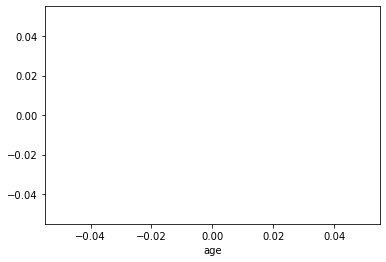

In [48]:
outlier_analysis("age")

count   0.00
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: bmi, dtype: float64

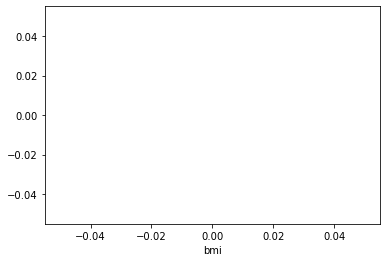

In [49]:
outlier_analysis("bmi")

### converting all categorical variables to numeric(Encode)

In [79]:
import seaborn as sns

In [81]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", df=data)

ValueError: Could not interpret input 'smoker'

In [51]:
data['charges'].describe()

count    1331.00
mean    13036.78
std     11699.36
min      1121.87
25%      4719.63
50%      9301.89
75%     16359.17
max     49577.66
Name: charges, dtype: float64

In [52]:
data3a_orginal=data.copy()

In [57]:
from scipy.stats import norm

Text(0, 0.5, 'amount')

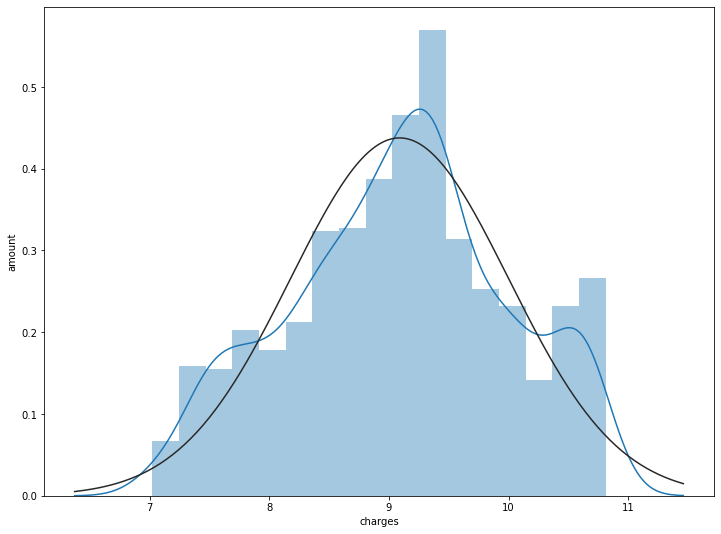

In [58]:
plt.figure(figsize=(12,9))
sns.distplot(np.log(data['charges']), fit= norm)
plt.xlabel("charges")
plt.ylabel("amount")

In [59]:
data['charges']=np.log(data['charges'])# Be carefull at the end of the projerct you should inverse that transformation

### Encoding

In [60]:
#categrocial variables
data2_cat=data2.select_dtypes(include='object')
data2_cat.columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [61]:
data2.sex.value_counts()

male      672
female    659
Name: sex, dtype: int64

In [62]:
data2['sex']=data2['sex'].map({'male':0,'female':1})

In [71]:
data2.smoker.value_counts()

no     1064
yes     267
Name: smoker, dtype: int64

In [72]:
data2['smoker']=data2['smoker'].map({'no':0,'yes':1})

In [63]:
data2.region.value_counts()

southeast    362
southwest    323
northeast    323
northwest    323
Name: region, dtype: int64

In [64]:
data2.shape

(1331, 7)

#### to inverse that transformation

<AxesSubplot:xlabel='age', ylabel='Density'>

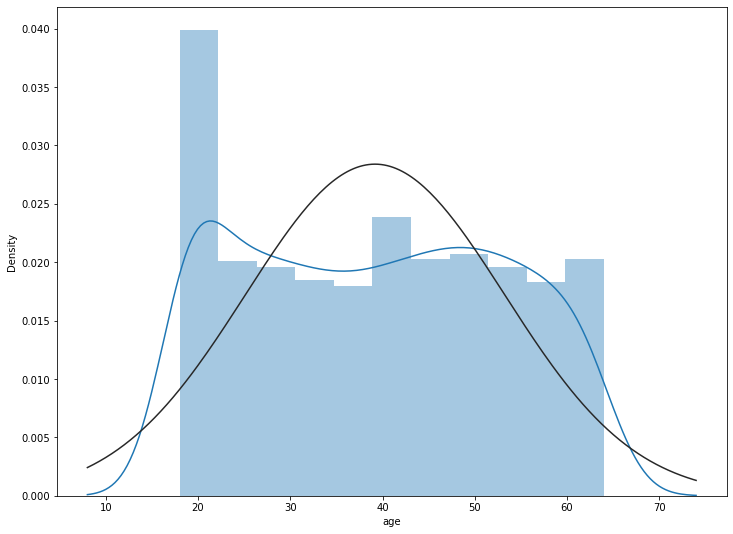

In [75]:
from scipy.stats import norm
plt.figure(figsize=(12,9))
sns.distplot(data['age'], fit= norm)

In [76]:
sns.lmplot(x="age", y="charges", hue="smoker", df=data, palette = 'inferno_r', size = 7)

TypeError: lmplot() got an unexpected keyword argument 'df'

### converting categorical variable into dummies

In [65]:
##one hot encoding(convert categorical variable into dummy)

data3= pd.get_dummies(data2, drop_first=True)
data3.shape

(1331, 9)

In [66]:
data4=data3

In [77]:
import seaborn as sns

In [78]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", df=data)

ValueError: Could not interpret input 'smoker'

## OLS Regression Model

In [70]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


sm = ols("smoker ~ charges",data=data4).fit()
print(sm.summary())

PatsyError: Error evaluating factor: NameError: name 'smoker' is not defined
    smoker ~ charges
    ^^^^^^

#### Correlation

In [82]:
data4.corr()

,age,sex,bmi,children,charges,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.00,0.02,0.11,0.04,0.53,-0.03,-0.00,-0.01,0.01
sex,0.02,1.00,-0.05,-0.02,-0.00,-0.08,0.01,-0.02,0.01
bmi,0.11,-0.05,1.00,0.01,0.12,-0.01,-0.14,0.27,-0.01
children,0.04,-0.02,0.01,1.00,0.17,0.01,0.02,-0.02,0.02
charges,0.53,-0.00,0.12,0.17,1.00,0.66,-0.02,0.02,-0.04
smoker_yes,-0.03,-0.08,-0.01,0.01,0.66,1.00,-0.04,0.07,-0.04
region_northwest,-0.00,0.01,-0.14,0.02,-0.02,-0.04,1.00,-0.35,-0.32
region_southeast,-0.01,-0.02,0.27,-0.02,0.02,0.07,-0.35,1.00,-0.35
region_southwest,0.01,0.01,-0.01,0.02,-0.04,-0.04,-0.32,-0.35,1.00


<AxesSubplot:>

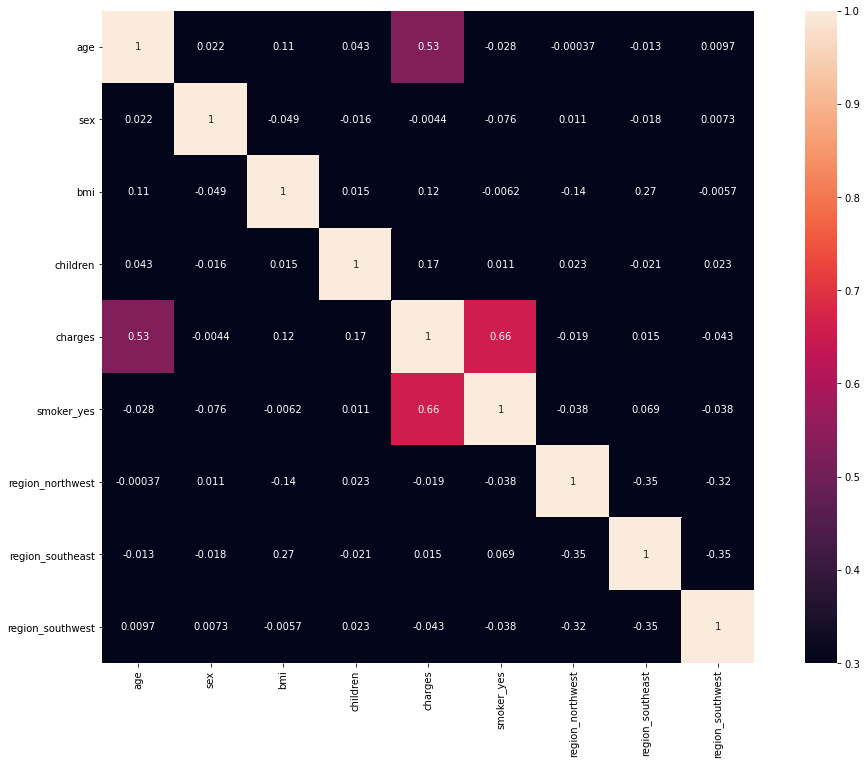

In [83]:
corr=data4.corr()
f, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(corr,vmax=1, vmin=0.3, square=True, annot=True)

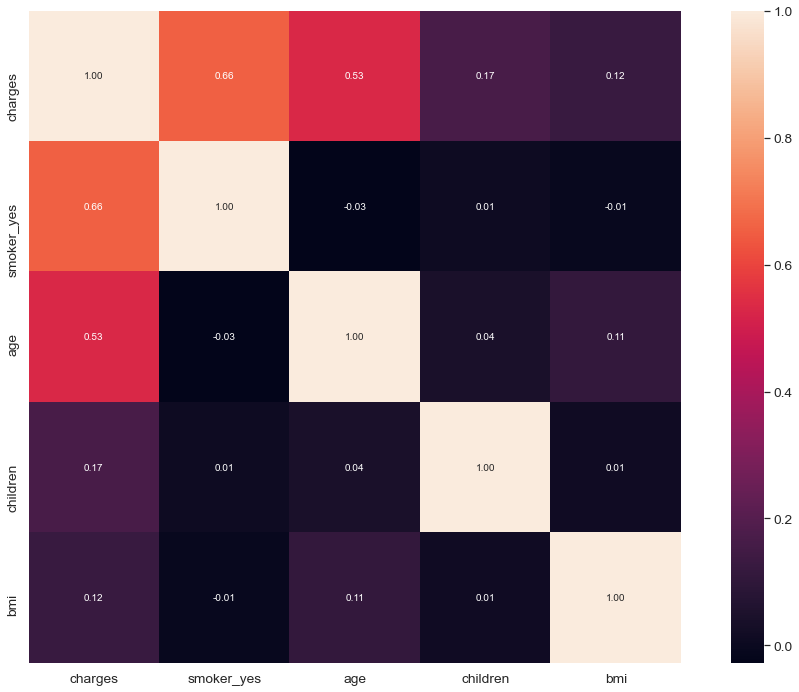

In [84]:
#saleprice correlation matrix(zoomed heatmap style)
k = 5 #number of variables for heatmap
cols = corr.nlargest(k, 'charges')['charges'].index
cm = np.corrcoef(data4[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(18, 12))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
    annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

In [85]:
s = corr.unstack()
s[(abs(s)>0.6) & (abs(s) < 1)]

charges     smoker_yes   0.66
smoker_yes  charges      0.66
dtype: float64

### so here a  strong correlation is only observed with the smoking status of the patient

In [86]:
def remove_collinear_features(data, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Energy Star Score
    y = data['charges']
    data.drop(columns = ['charges'],inplace=True)
    
    # Calculate the correlation matrix
    corr_matrix = data.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    data = data.drop(columns = drops)
    
    # Add the score back in to the data
    data['charges'] = y
               
    return data

In [87]:
# Remove the collinear features above a specified correlation coefficient
data4 = remove_collinear_features(data4, 0.6)

### Scaling:applying LOF

In [88]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data4 = pd.DataFrame(sc.fit_transform(data4), columns=data4.columns)

In [89]:
#separating target and predictors
X=data4.drop('charges',axis=1)
y=data4['charges']
X.shape

(1331, 8)

In [90]:
from sklearn.neighbors import LocalOutlierFactor
lof=LocalOutlierFactor(n_neighbors=5)
res=lof.fit_predict(X)
X_not_outlier=X[res !=-1]
y_not_outlier=y[res !=-1]

In [91]:
data_clean=pd.concat([X_not_outlier,y_not_outlier],axis=1)
data_clean.shape

(1274, 9)

In [92]:
data4=data_clean

In [93]:
data4.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest', 'charges'],
      dtype='object')

# Linear Regression Model(Regression)

In [95]:
#separating target and predictors
X=data4.drop('charges',axis=1)
y=data4.charges

In [96]:

#Linear regression model using OLS
import statsmodels.api as sm
X1 = sm.add_constant(X)
ols = sm.OLS(y,X1)
lr = ols.fit()

print(lr.summary())

p=lr.pvalues
pvalue=max(lr.pvalues[1:len(lr.pvalues)])

while (pvalue>=.05):
    loc=0
    for i in lr.pvalues:
        if (i==pvalue):
          feature=lr.pvalues.index[loc] 
          print(feature)
          break
        loc+=1
    X=X.drop(feature,axis=1)
    X1 = sm.add_constant(X)
    ols = sm.OLS(y,X1)
    lr = ols.fit()
    pvalue=max(lr.pvalues[1:len(lr.pvalues)])
    
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     527.3
Date:                Tue, 15 Feb 2022   Prob (F-statistic):               0.00
Time:                        06:42:09   Log-Likelihood:                -869.12
No. Observations:                1274   AIC:                             1756.
Df Residuals:                    1265   BIC:                             1803.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0022      0.013  

### Separating test and train sets

In [97]:
#separating test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [98]:

from sklearn.linear_model import LinearRegression

In [99]:
#creating LinearRegression Object
model = LinearRegression()
#Training the Data Model
model.fit(X_train,y_train)

LinearRegression()

0.0061746588112015005
coeff=                   Coefficient
age                      0.53
sex                      0.05
bmi                      0.09
children                 0.15
smoker_yes               0.67
region_southeast        -0.05
region_southwest        -0.04


Text(0, 0.5, 'y_pred')

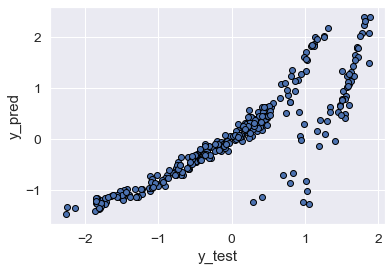

In [100]:
"""Model Evaluation"""
#Displaying the Intercept
print(model.intercept_)
#Coefficient
coeff_data = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print('coeff=',coeff_data)

y_pred = model.predict(X_test)


plt.scatter(y_test, y_pred, edgecolor='black')
plt.xlabel("y_test")
plt.ylabel("y_pred")

In [101]:
(abs(y_test-y_pred)).describe()

count   319.00
mean      0.32
std       0.38
min       0.00
25%       0.07
50%       0.17
75%       0.45
max       2.34
Name: charges, dtype: float64

In [102]:
"""Calculating the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error 
MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, because we want to minimize them"""

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 0.31549146288661944
MSE: 0.2415936992330162
RMSE: 0.49152181969167574


In [103]:
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(y_test,y_pred))
print(r2_score(y_train,model.predict(X_train)))

0.7668617887109838
0.7690525867966889


R2 shows how well terms (data points) fit a curve or line. Adjusted R2 also indicates how well
terms fit a curve or line, but adjusts for the number of terms in a model. If you add more and more 
useless variables to a model, adjusted r-squared will decrease. If you add more useful variables,
adjusted r-squared will increase. Adjusted R2 will always be less than or equal to R2.

In [104]:
print('Adjusted_R2= ',1 - (((len(X_test.index) - 1) / (len(X_test.index) - len(X_test.columns) - 1)) * (1 - r2_score(y_test,y_pred))))

Adjusted_R2=  0.761614304855604


In [105]:
"""K-FOLD CROSSVALIDATION"""
from sklearn.model_selection import cross_val_score
clr=LinearRegression()
cross_val_score(clr,X,y,cv=4)
cross_val_score(clr,X,y,cv=4).mean()

0.7636972934759783

In [106]:
LR_score=cross_val_score(clr,X,y,cv=4).mean()

# KNN Regression

In [107]:
X.isnull().sum()

age                 0
sex                 0
bmi                 0
children            0
smoker_yes          0
region_southeast    0
region_southwest    0
dtype: int64

In [108]:
#extract feature set and target separately
X=data4.drop('charges',axis=1)
y=data4.charges

In [109]:
#splitting dataset into training and test-set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [110]:
#import model
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()# create a instanse

In [111]:
#training
model.fit(X_train,y_train)

KNeighborsRegressor()

In [112]:
y_pred = model.predict(X_test)

In [113]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 0.29413530744640337
MSE: 0.23439003367050348
RMSE: 0.48413844473508144


In [114]:

print(r2_score(y_test,y_pred))
print(r2_score(y_train,model.predict(X_train)))

0.7738133346714133
0.860972968476618


In [115]:

"""K-FOLD CROSSVALIDATION"""
clr=KNeighborsRegressor()
print(cross_val_score(clr,X,y,cv=4))
print(cross_val_score(clr,X,y,cv=4).mean())

[0.83578534 0.74655942 0.83690121 0.75807367]
0.7943299093890643


### Tunning:

In [116]:
scores = []
for i in range(1,30):
    clf3 = KNeighborsRegressor(n_neighbors=i)
    scores.append(cross_val_score(clf3,X,y,cv=4).mean())

Text(0.5, 1.0, 'Finding optimal K')

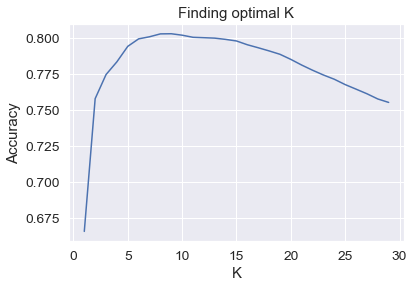

In [117]:
import matplotlib.pyplot as plt
plt.plot(range(1,30),scores)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Finding optimal K")

In [118]:
max(scores)

0.80306593071373

In [119]:
model = KNeighborsRegressor(n_neighbors=8)

In [120]:
#training
model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=8)

In [121]:
y_pred = model.predict(X_test)

In [122]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 0.2891802821852275
MSE: 0.21925638098129183
RMSE: 0.4682482044613645


In [123]:
print(r2_score(y_test,y_pred))
print(r2_score(y_train,model.predict(X_train)))

0.7884173277781583
0.849501974114452


In [124]:
print('Adjusted_R2= ',1 - (((len(X_test.index) - 1) / (len(X_test.index) - len(X_test.columns) - 1)) * (1 - r2_score(y_test,y_pred))))

Adjusted_R2=  0.7829571297853366


In [125]:
"""K-FOLD CROSSVALIDATION"""
from sklearn.model_selection import cross_val_score
clr=KNeighborsRegressor(n_neighbors=7)
print(cross_val_score(clr,X,y,cv=4))
print(cross_val_score(clr,X,y,cv=4).mean())

[0.84517246 0.75541729 0.84303993 0.76023965]
0.8009673348717941


In [126]:
KNN_score=cross_val_score(clr,X,y,cv=4).mean()

## Model comparison

Text(0.5, 1.0, 'Model Comparison on Score')

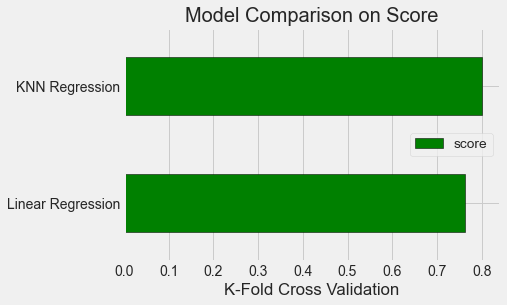

In [127]:
plt.style.use('fivethirtyeight')
figsize=(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression','KNN Regression',
                                           ],
                                 'score': [LR_score,KNN_score
                                          ]})

# Horizontal bar chart 
model_comparison.sort_values('score', ascending = True).plot(x = 'model', y = 'score', kind = 'barh',
                                                           color = 'green', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('K-Fold Cross Validation'); plt.xticks(size = 14)
plt.title('Model Comparison on Score', size = 20)